In [3]:
%matplotlib inline
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/team3_idl/env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [4]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255.
X_test = X_test / 255.
print(X_train.shape)

(60000, 28, 28, 1)


In [5]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [6]:
def evaluate_with_activation(input_layer_activation, hidden_layer_activation, output_layer_activation):
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation=input_layer_activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())

    model.add(Dense(128, activation=hidden_layer_activation))
    model.add(Dense(num_classes, activation=output_layer_activation))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=12, batch_size=200, verbose=0)
    
    scores = model.evaluate(X_test, y_test, verbose=0)
    print('\n==========================================')
    print('With input layer activation: {}, hidden layer activation: {}, output layer activation: {} '.format(input_layer_activation, hidden_layer_activation, output_layer_activation))
    print("Baseline Error: %.2f%%" % (100-scores[1]*100))
    return (100-scores[1]*100)


With input layer activation: sigmoid, hidden layer activation: sigmoid, output layer activation: softmax 
Baseline Error: 1.88%

With input layer activation: relu, hidden layer activation: relu, output layer activation: softmax 
Baseline Error: 1.01%

With input layer activation: tanh, hidden layer activation: tanh, output layer activation: softmax 
Baseline Error: 1.42%


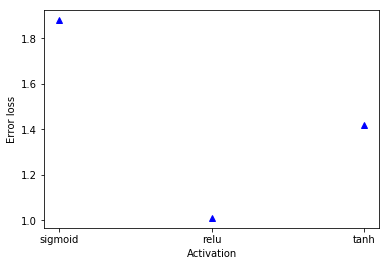

In [8]:
errors = []
#for n_layers in range(1, 6):
errors.append(evaluate_with_activation( 'sigmoid', 'sigmoid', 'softmax'))
errors.append(evaluate_with_activation( 'relu', 'relu', 'softmax'))
errors.append(evaluate_with_activation( 'tanh', 'tanh', 'softmax'))

#x_axis = [x for x in range(1, len(errors) +1)]
#plt.plot(x_axis, errors)

x = [1,2,3]

my_xticks = ['sigmoid','relu','tanh']
plt.xticks(x, my_xticks)
plt.plot(x, errors, 'b^')
plt.ylabel('Error loss')
plt.xlabel('Activation')
plt.show()


In [13]:
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)


With input layer activation: sigmoid, hidden layer activation: sigmoid, output layer activation: softmax 
Baseline Error: 5.28%

With input layer activation: relu, hidden layer activation: relu, output layer activation: softmax 
Baseline Error: 1.41%

With input layer activation: tanh, hidden layer activation: tanh, output layer activation: softmax 
Baseline Error: 1.48%

With input layer activation: sigmoid, hidden layer activation: sigmoid, output layer activation: softmax 
Baseline Error: 5.05%

With input layer activation: relu, hidden layer activation: relu, output layer activation: softmax 
Baseline Error: 1.37%

With input layer activation: tanh, hidden layer activation: tanh, output layer activation: softmax 
Baseline Error: 1.49%

With input layer activation: sigmoid, hidden layer activation: sigmoid, output layer activation: softmax 
Baseline Error: 5.35%

With input layer activation: relu, hidden layer activation: relu, output layer activation: softmax 
Baseline Error: 1.28

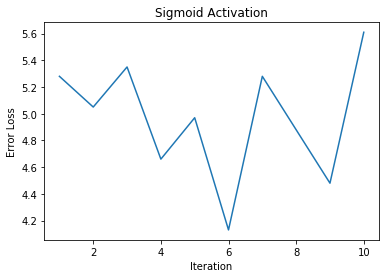

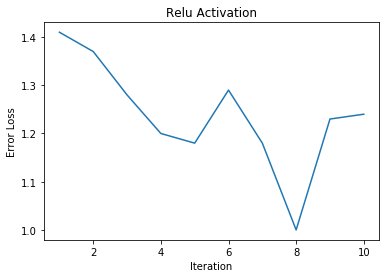

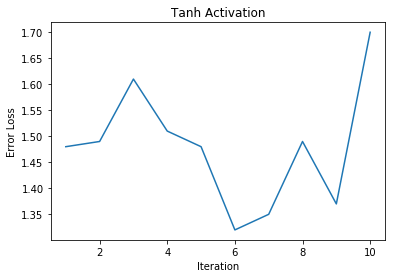

Mean of the iterations: 
Sigmoid: 4.968999999999997
Relu: 1.2380000000000024
Tanh: 1.4800000000000026


In [15]:
# In order to calculate the mean of 10 iterations of the error:
h1_errors = []
h2_errors = []
h3_errors = []
for i in range(10):
    h1_errors.append(evaluate_with_activation('sigmoid', 'sigmoid', 'softmax'))
    h2_errors.append(evaluate_with_activation( 'relu', 'relu', 'softmax'))
    h3_errors.append(evaluate_with_activation( 'tanh', 'tanh', 'softmax'))
    
x = [i + 1 for i in range(10)]
plt.plot(x, h1_errors)
plt.title('Sigmoid Activation')
plt.ylabel('Error Loss')
plt.xlabel('Iteration')
plt.show()

plt.plot(x, h2_errors)
plt.title('Relu Activation')
plt.ylabel('Error Loss')
plt.xlabel('Iteration')
plt.show()

plt.plot(x, h3_errors)
plt.title('Tanh Activation')
plt.ylabel('Error Loss')
plt.xlabel('Iteration')
plt.show()


mean_h1 = mean(h1_errors)
mean_h2 = mean(h2_errors)
mean_h3 = mean(h3_errors)

print('Mean of the iterations: \nSigmoid: {}\nRelu: {}\nTanh: {}'.format(mean_h1, mean_h2, mean_h3))

After running the 10 iterations we have obtained the following errors:
```
Sigmoid:
['5.28', '5.05', '5.35', '4.66', '4.97', '4.13', '5.28', '4.88', '4.48', '5.61']

Relu:
['1.41', '1.37', '1.28', '1.20', '1.18', '1.29', '1.18', '1.00', '1.23', '1.24']
 
 Tanh:
['1.48', '1.49', '1.61', '1.51', '1.48', '1.32', '1.35', '1.49', '1.37', '1.70']
 

Mean of the errors: 
Sigmoid: 4.968
Relu: 1.238
Tanh: 1.480
```



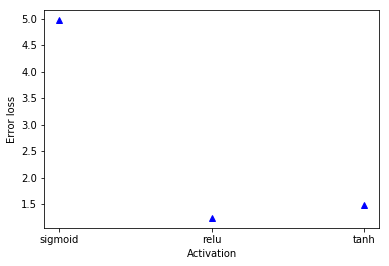

In [31]:
x = [1,2,3]
errors = [mean_h1, mean_h2, mean_h3]
my_xticks = ['sigmoid','relu','tanh']
plt.xticks(x, my_xticks)
plt.plot(x, errors, 'b^')
plt.ylabel('Error loss')
plt.xlabel('Activation')
plt.show()

After noticing that the error is not that much variable between iterations we only will take one iteration for each combination in order to validate the result.



With input layer activation: sigmoid, hidden layer activation: relu, output layer activation: softmax 
Baseline Error: 88.65%

With input layer activation: relu, hidden layer activation: sigmoid, output layer activation: softmax 
Baseline Error: 0.97%

With input layer activation: relu, hidden layer activation: tanh, output layer activation: softmax 
Baseline Error: 1.02%

With input layer activation: tanh, hidden layer activation: relu, output layer activation: softmax 
Baseline Error: 1.45%

With input layer activation: sigmoid, hidden layer activation: tanh, output layer activation: softmax 
Baseline Error: 88.65%

With input layer activation: tanh, hidden layer activation: sigmoid, output layer activation: softmax 
Baseline Error: 1.24%


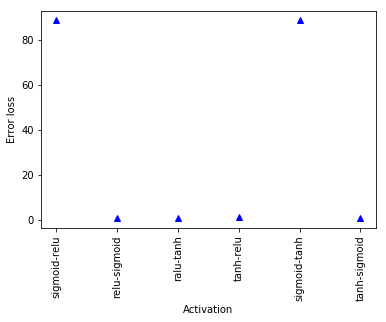

In [9]:
errors = []

errors.append(evaluate_with_activation( 'sigmoid', 'relu', 'softmax'))
errors.append(evaluate_with_activation( 'relu', 'sigmoid', 'softmax'))
errors.append(evaluate_with_activation( 'relu', 'tanh', 'softmax'))
errors.append(evaluate_with_activation( 'tanh', 'relu', 'softmax'))
errors.append(evaluate_with_activation( 'sigmoid', 'tanh', 'softmax'))
errors.append(evaluate_with_activation( 'tanh', 'sigmoid', 'softmax'))


x = [1,2,3,4,5,6]

my_xticks = ['sigmoid-relu','relu-sigmoid','ralu-tanh', 'tanh-relu','sigmoid-tanh','tanh-sigmoid']
plt.xticks(x, my_xticks)
plt.xticks(rotation=90)
plt.plot(x, errors, 'b^')
plt.ylabel('Error loss')
plt.xlabel('Activation')
plt.show()

After evaluating the previous code, we obtain the following errors:
```
'relu-tanh': 1.02,
'relu-sigmoid': 0.97,
'sigmoid-relu': 88.65,
'sigmoid-tanh': 88.65,
'tanh-relu': 1.45,
'tanh-sigmoid': 1.24
```

We can observe that combining sigmoid with other activations (in this order) ends in huge errors.



Looking at the results we can conclude that the best activation (at least for this data) is the Relu-Sigmoid.